#    1. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

- Nama : Fahmi Suwandhi
- Batch : 10

# 2. Import Libraries

> *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [64]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library Input missing Value
from sklearn.impute import SimpleImputer

# Handling outlier
from feature_engine.outliers import Winsorizer

# Library Splitting Data
from sklearn.model_selection import train_test_split

# Feature Encoding
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Feature Encoding using OneHoTEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Features Model
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans


# Metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# PCA
from sklearn.decomposition import PCA, FactorAnalysis

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import pickle

#### URL Streamlit

> - URL_frontend = https://fahmi-p1m2-frontend.herokuapp.com/
> - URL_backend = https://fahmi-suwandhi-10-p1m2.herokuapp.com/paris_housing

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Data load
df = pd.read_csv('ParisHousingClass.csv')
print(df.shape)
df.head()

(10000, 18)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


- Exp :
> kita dapat melihat ukuran dari data kita memiliki 10000 baris dan 18 kolom

In [3]:
# Copy dataset original kedalam variabel df_copy
df_ori = df.copy()

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [4]:
# deskripsikan .info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

- Exp :
    > jika dilihat dari df.info semua tipe data nya berbentuk numerik kecuali pada kolom target, namun apabila di lihat dari dataset sebenarnya ada beberapa kolom yang seharusnya bertipe data kategorik tetapi sudah dibuatkan label encode

In [5]:
# data describe
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


- Exp :
    > - Menurut data describe diatas rata" luas tanah di perumahan ini sebesar 49870 meter
    > - rata" jumlah kamar dan lantai sekitar 50

Basic     8735
Luxury    1265
Name: category, dtype: int64


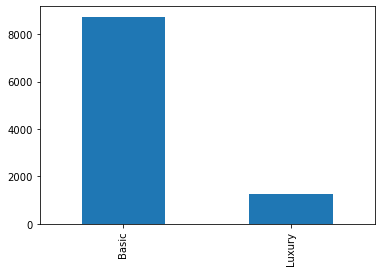

In [6]:
# Cek jumlah data dari kolom target
df['category'].value_counts().plot(kind='bar')
print(df['category'].value_counts())

- Exp :
    > - Jika dilihat dari kolom target jumlah perumahan dengan kategori basic lebih banyak dibandingkan dengan luxury. hal ini dapat menyebabkan data menjadi inbalance dan mempengaruhi model

<AxesSubplot:xlabel='isNewBuilt', ylabel='count'>

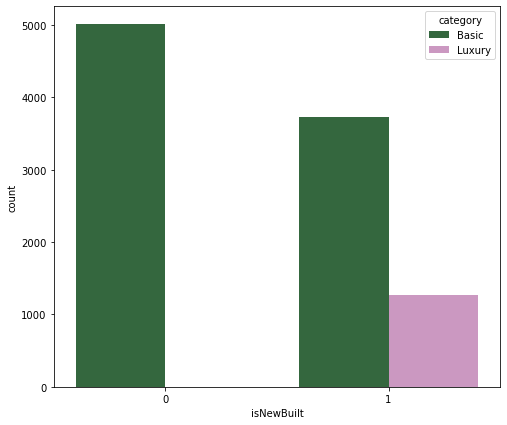

In [7]:
# Visualisasi kolom isNewBuilt
plt.figure(figsize=(8,7))
sns.countplot(x='isNewBuilt',hue='category',palette="cubehelix", data=df)

- Exp :
    > - jika dilihat dari data dimana angka 0 adalah tidak dilakukan renovasi dan angka 1 sudah dilakukan renovasi
    > - untuk perumahan bertipe basic ada sekitar 5000 unit yang tidak dilakukan renocasi dan sekitar 3500 unit telah dilakukan renovasi
    > - untuk perumahan bertipe luxury semua unit telah dilakukan renovasi

<AxesSubplot:xlabel='cityPartRange', ylabel='count'>

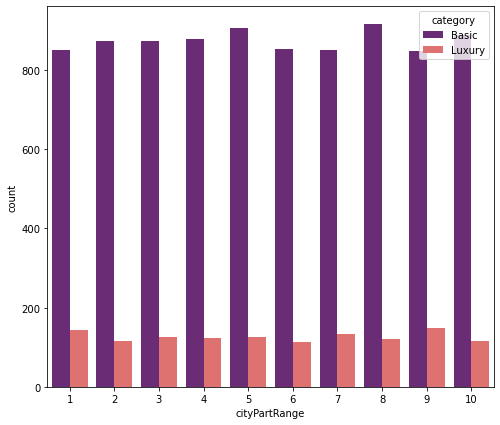

In [8]:
# Visualisasi city part range
plt.figure(figsize=(8,7))
sns.countplot(x='cityPartRange',hue='category', palette='magma',data=df)

- exp :
    > - pada kolo cityPartRange adalah semakin tinggi jangkauannya semakin ekslusif lingkungan perumahannya
    > - jika di lihat dari visualisasi histogram tipe basic dan luxury memiliki tingkat ekslusif lingkungan perumahannya cukup merata dari yang paling ekslusif sampai yang tidak

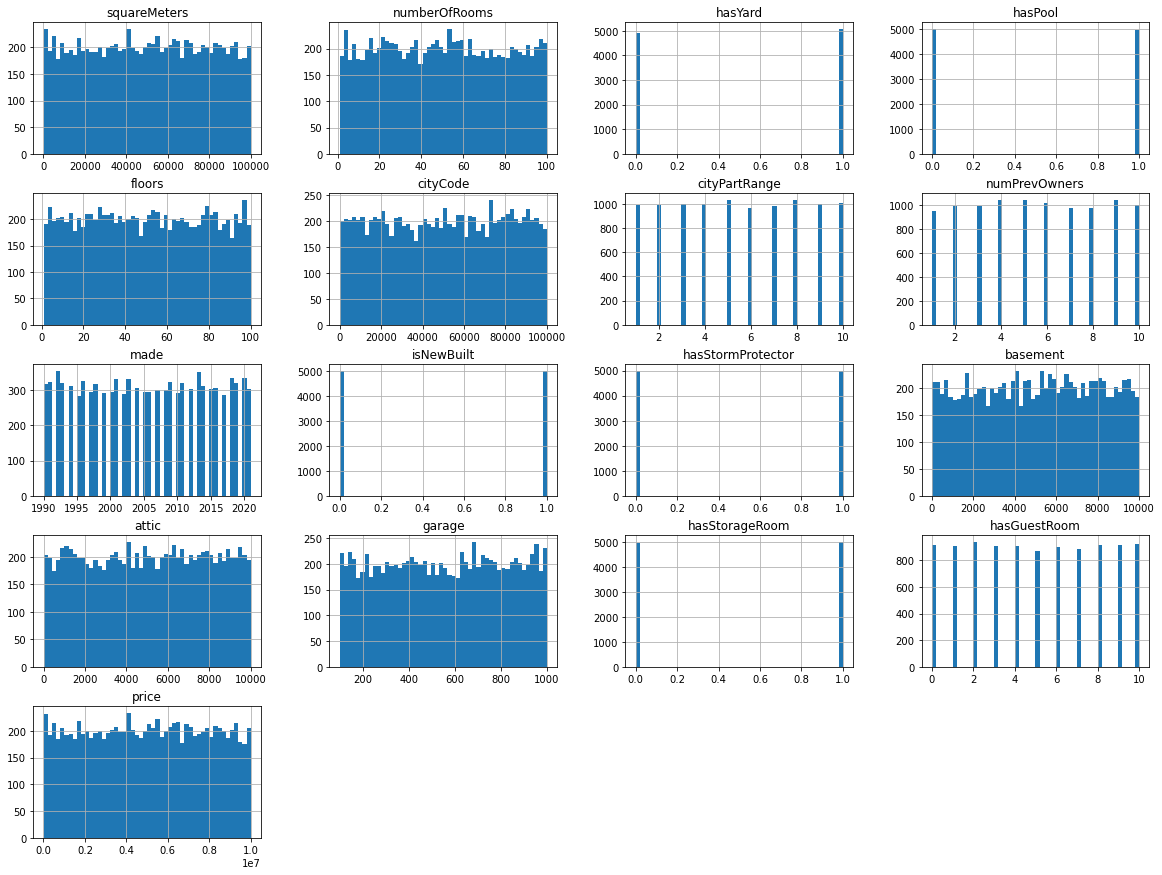

In [9]:
# Visualisasi persebaran data setiap columns
%matplotlib inline
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))

plt.show()

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### 5.1 Data Inference

In [10]:
# Mengambil data inference dari data set
df_inf = df.sample(10, random_state=9)

# Remove Inference-Set dari Dataset

df_train_test = df.drop(df_inf.index)
df_train_test

# Reset Index 
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,26506,95,0,1,69,86093,4,3,2015,1,0,9373,6376,509,0,1,2660579.5,Basic
1,48403,62,0,0,3,52029,4,9,1996,1,0,5786,9954,941,0,10,4841127.6,Basic
2,85429,60,1,1,57,75588,7,6,2016,1,1,1421,6473,405,0,8,8553293.6,Luxury
3,58394,19,1,0,56,19251,6,3,2001,0,0,3215,9841,239,0,8,5848843.1,Basic
4,10830,28,0,1,65,56534,5,8,2006,0,1,5829,9328,439,0,1,1093719.6,Basic
5,30300,49,0,0,74,95266,7,3,1998,1,0,6474,5517,988,0,1,3033117.8,Basic
6,58752,79,0,0,98,82396,4,9,1997,0,1,9961,3122,831,0,4,5881679.7,Basic
7,75927,100,1,1,38,55528,5,3,2001,1,0,4681,1453,472,1,7,7599356.1,Luxury
8,77913,53,1,1,64,12082,1,10,2007,0,1,328,6752,609,1,10,7801697.7,Basic
9,59800,47,0,1,27,44815,6,9,2021,0,0,5075,3104,864,0,4,5984462.1,Basic


#### 5.2 Split Dataset

In [11]:
# split untuk model classification dan regresi
# Target classification
df_class = df_train_test.drop('price', axis=1)

# Target Regresi
df_reg = df_train_test.drop('category', axis=1)

In [12]:
# target Classification
# Split between X (features) and y (target)

X1 = df_class.drop('category', axis=1)
y1 = df_class['category']

# Split untuk Train-Set and Test-Set

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=17)

print('Train Size : ', X_train1.shape)
print('Test Size  : ', X_test1.shape)
print('y_train Size  : ', y_train1.shape)
print('y_test Size  : ', y_test1.shape)

Train Size :  (7992, 16)
Test Size  :  (1998, 16)
y_train Size  :  (7992,)
y_test Size  :  (1998,)


In [13]:
# target Regresi
# Split between X (features) and y (target)

X2 = df_reg.drop('price', axis=1)
y2 = df_reg['price']

# Split untuk Train-Set and Test-Set

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=16)

print('Train Size : ', X_train2.shape)
print('Test Size  : ', X_test2.shape)
print('y_train Size  : ', y_train2.shape)
print('y_test Size  : ', y_test2.shape)

Train Size :  (7992, 16)
Test Size  :  (1998, 16)
y_train Size  :  (7992,)
y_test Size  :  (1998,)


In [14]:
df_ori.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [15]:
# Mendapatkan Numerical Columns and Categorical Columns
num_columns = ['squareMeters','numberOfRooms','floors','cityPartRange','numPrevOwners','basement','attic','garage','hasGuestRoom']
cat_columns = ['hasYard','hasPool','isNewBuilt','hasStormProtector','hasStorageRoom']

# Split Train-Set and Test-Set berdasrkan tipe kolom (Numerical/Categorical)
# Target Classification
X_train1_num = X_train1[num_columns]
X_train1_cat = X_train1[cat_columns]

X_test1_num = X_test1[num_columns]
X_test1_cat = X_test1[cat_columns]

# Target Regresion
X_train2_num = X_train2[num_columns]
X_train2_cat = X_train2[cat_columns]

X_test2_num = X_test2[num_columns]
X_test2_cat = X_test2[cat_columns]

# Label Encode
y_train1 = y_train1.replace({'Basic':0,'Luxury':1})
y_test1 = y_test1.replace({'Basic':0,'Luxury':1})

#### 5.3 Handling Missing value

In [16]:
# Cek Missing value target calssification
print(X_train1.isnull().sum().sum())
print(X_test1.isnull().sum().sum())
print(y_train1.isnull().sum().sum())
print(y_test1.isnull().sum().sum())
print('total missing values = ', X_train1.isnull().sum().sum() + X_test1.isnull().sum().sum() + y_train1.isnull().sum().sum() + y_test1.isnull().sum().sum())

0
0
0
0
total missing values =  0


In [17]:
# Cek Missing value target regresi
print(X_train2.isnull().sum().sum())
print(X_test2.isnull().sum().sum())
print(y_train2.isnull().sum().sum())
print(y_test2.isnull().sum().sum())
print('total missing values = ', X_train2.isnull().sum().sum() + X_test2.isnull().sum().sum() + y_train2.isnull().sum().sum() + y_test2.isnull().sum().sum())

0
0
0
0
total missing values =  0


#### 5.4 Handling Outliers

In [18]:
# Target Classification
#Cek Skewness
skew1 = []
for i in num_columns:
    skew1.append(abs(X_train1[i].skew()))

# Visualisasi ke data frame
df_skew1 = pd.DataFrame({'Kolom':num_columns, 'Skewness_abs':skew1})
df_skew1['normal'] = df_skew1.Skewness_abs.apply(lambda x: True if x<=0.5 else False)
df_skew1

,Kolom,Skewness_abs,normal
0,squareMeters,0.014227,True
1,numberOfRooms,0.011049,True
2,floors,0.010637,True
3,cityPartRange,0.012577,True
4,numPrevOwners,0.005080,True
5,basement,0.031937,True
6,attic,0.023055,True
7,garage,0.024761,True
8,hasGuestRoom,0.013126,True


- Exp :
    > Setiap kolom memiliki persebaran data yang normal

In [19]:
# Cek Persentasi untuk kolom yg terdistribusi normal
percent_outliers1 = []
for i in num_columns:
    std = X_train1[i].std()
    upper = X_train1[i].mean() + 3*std
    lower = X_train1[i].mean() - 3*std
    percent = len(X_train1[(X_train1[i]>upper)|(X_train1[i]<lower)])*100/len(X_train1)
    percent_outliers1.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':num_columns, 'persentasi_outlier':percent_outliers1})

,Kolom,persentasi_outlier
0,squareMeters,0.0
1,numberOfRooms,0.0
2,floors,0.0
3,cityPartRange,0.0
4,numPrevOwners,0.0
5,basement,0.0
6,attic,0.0
7,garage,0.0
8,hasGuestRoom,0.0


- Exp :
    > tidak ada outlier di setiap kolom

#### 5.5 Features Selection

Text(0.5, 1.0, 'Korelasi pada kolom Kategori')

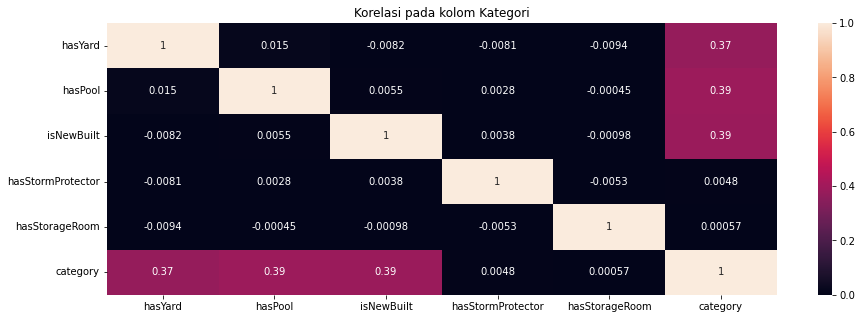

In [20]:
# Cek kolerasi pada kolom categorikal pada target Category
df_corr_cat = pd.concat([X_train1_cat, y_train1], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_corr_cat.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Kategori')

Text(0.5, 1.0, 'Korelasi pada kolom Numerik Category')

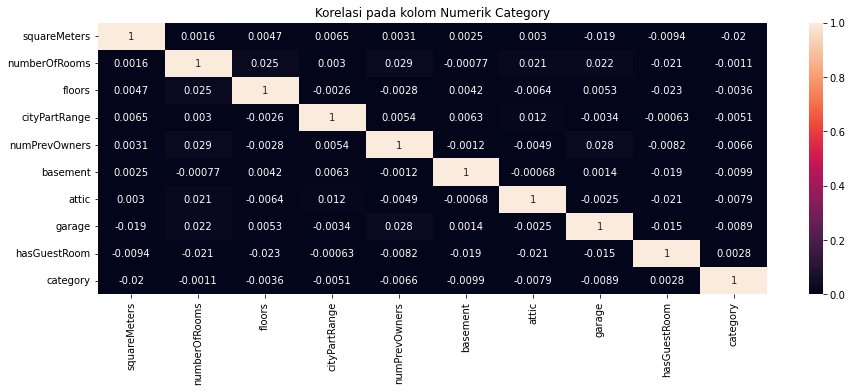

In [21]:
# Cek kolerasi pada kolom Numerik Category
df_corr_num = pd.concat([X_train1_num, y_train1], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_corr_num.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Numerik Category')

Text(0.5, 1.0, 'Korelasi pada kolom Kategori Price')

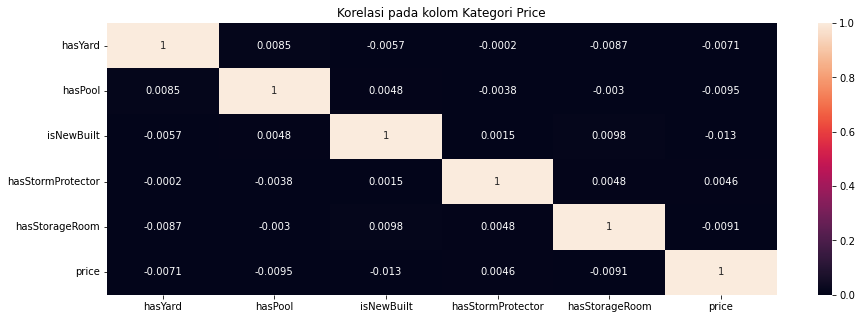

In [22]:
# Cek kolerasi pada kolom categorikal pada target Price
df_corr_cat2 = pd.concat([X_train2_cat, y_train2], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_corr_cat2.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Kategori Price')

Text(0.5, 1.0, 'Korelasi pada kolom Numerik Price')

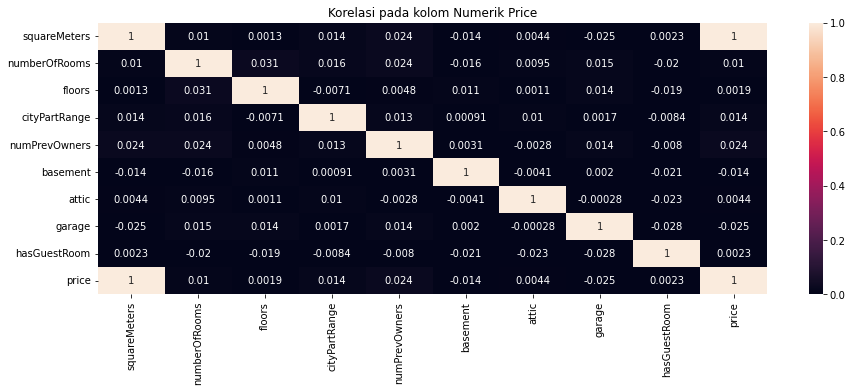

In [23]:
# Cek kolerasi pada kolom Numerik pada target Price
df_corr_num2 = pd.concat([X_train2_num, y_train2], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_corr_num2.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Numerik Price')

#### 5.6 Scaling

In [24]:
# Menggabungkan data Numerikal dan kategorikal pada X_train dan X_test
X_train1_final = X_train1_num.join(X_train1_cat)
X_test1_final = X_test1_num.join(X_test1_cat)

X_train2_final = X_train2_num.join(X_train2_cat)
X_test2_final = X_test2_num.join(X_test2_cat)

In [25]:
# Scaling data numerik
scaler1 = StandardScaler()
scaler1.fit(X_train1_final)
X_train1_scaled = scaler1.transform(X_train1_final)
X_test1_scaled = scaler1.transform(X_test1_final)

scaler2 = MinMaxScaler()
scaler2.fit(X_train2_final)
X_train2_scaled = scaler2.transform(X_train2_final)
X_test2_scaled = scaler2.transform(X_test2_final)

# 6. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

#### 6.1 Model definition classification

In [26]:
# Model Logistic Regresion
# Inisiasi Model Logistic Regresion
model_logreg = LogisticRegression()
model_logreg.fit(X_train1_final,y_train1)

# Model SVC
# Inisiasi Model SVC
model_svc = SVC()
model_svc.fit(X_train1_final,y_train1)

# Model Random Forest
# Inisiasi Model Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train1_final,y_train1)

# Model Decision Tree
# Inisiasi Model Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train1_final,y_train1)

# Model KNN
# Inisiasi Model KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train1_final,y_train1)


KNeighborsClassifier()

#### 6.2 Model Definition Regresion

In [27]:
# Model Logistic Regresion
# Inisiasi Model Logistic Regresion
model_lingreg = LinearRegression()
model_lingreg.fit(X_train2_final,y_train2)

# Model SVC
# Inisiasi Model SVC
model_svr = SVR()
model_svr.fit(X_train2_final,y_train2)

# Model Random Forest
# Inisiasi Model Random Forest
model_rr = RandomForestRegressor()
model_rr.fit(X_train2_final,y_train2)

# Model Decision Tree
# Inisiasi Model Decision Tree
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train2_final,y_train2)

# Model KNN
# Inisiasi Model KNN
model_knnr = KNeighborsRegressor()
model_knnr.fit(X_train2_final,y_train2)

KNeighborsRegressor()

# 7. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### 7.1 Model Training Classification

In [28]:
#Logistic Regresion
# Melakukan Train Model terhadap Data Train
y_pred_Trainlog = model_logreg.predict(X_train1_final)
# Melakukan Traing Model terhadap Data Test
y_pred_Testlog = model_logreg.predict(X_test1_final)

# Model SVC
# Melakukan Train Model terhadap Data Train
y_pred_TrainSVC = model_svc.predict(X_train1_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestSVC = model_svc.predict(X_test1_final)

# Random Forest
# Melakukan Train Model terhadap Data Train
y_pred_TrainRF = model_rf.predict(X_train1_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestRF = model_rf.predict(X_test1_final)

# Decision Tree
# Melakukan Train Model terhadap Data Train
y_pred_TrainDT = model_dt.predict(X_train1_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestDT = model_dt.predict(X_test1_final)

# KNN
# Melakukan Train Model terhadap Data Train
y_pred_TrainKNN = model_knn.predict(X_train1_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestKNN = model_knn.predict(X_test1_final)

#### 7.1 Model Training Regresion

In [29]:
#Linier Regresion
# Melakukan Train Model terhadap Data Train
y_pred_Trainlinreg = model_lingreg.predict(X_train2_final)
# Melakukan Traing Model terhadap Data Test
y_pred_Testlinreg = model_lingreg.predict(X_test2_final)

# Model SVC
# Melakukan Train Model terhadap Data Train
y_pred_TrainSVR = model_svr.predict(X_train2_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestSVR = model_svr.predict(X_test2_final)

# Random Forest
# Melakukan Train Model terhadap Data Train
y_pred_TrainRR = model_rr.predict(X_train2_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestRR = model_rr.predict(X_test2_final)

# Decision Tree
# Melakukan Train Model terhadap Data Train
y_pred_TrainDTR = model_dtr.predict(X_train2_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestDTR = model_dtr.predict(X_test2_final)

# KNN
# Melakukan Train Model terhadap Data Train
y_pred_TrainKNNR = model_knnr.predict(X_train2_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestKNNR = model_knnr.predict(X_test2_final)

#### 7.3 Cross Validation

In [30]:
# Cross Validation Model Logistic Regresion
train_crossval_logreg = cross_val_score(model_logreg, 
                                      X_train1_final, 
                                      y_train1, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_logreg)
print('Accuracy - Mean - Cross Validation : ', train_crossval_logreg.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_logreg.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_logreg.mean()-train_crossval_logreg.std()) , '-', (train_crossval_logreg.mean()+train_crossval_logreg.std()))

Accuracy - All - Cross Validation  :  [0.87124625 0.87124625 0.87124625]
Accuracy - Mean - Cross Validation :  0.8712462462462462
Accuracy - Std - Cross Validation  :  0.0
Accuracy - Range of Test-Set       :  0.8712462462462462 - 0.8712462462462462


In [31]:
# Cross Validation Model SVC
train_crossval_svc = cross_val_score(model_svc, 
                                      X_train1_final, 
                                      y_train1, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_svc)
print('Accuracy - Mean - Cross Validation : ', train_crossval_svc.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_svc.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_svc.mean()-train_crossval_svc.std()) , '-', (train_crossval_svc.mean()+train_crossval_svc.std()))

Accuracy - All - Cross Validation  :  [0.87124625 0.87124625 0.87124625]
Accuracy - Mean - Cross Validation :  0.8712462462462462
Accuracy - Std - Cross Validation  :  0.0
Accuracy - Range of Test-Set       :  0.8712462462462462 - 0.8712462462462462


In [32]:
# Cross Validation Model Random Forest
train_crossval_rf = cross_val_score(model_rf, 
                                      X_train1_final, 
                                      y_train1, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_rf)
print('Accuracy - Mean - Cross Validation : ', train_crossval_rf.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_rf.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_rf.mean()-train_crossval_rf.std()) , '-', (train_crossval_rf.mean()+train_crossval_rf.std()))

Accuracy - All - Cross Validation  :  [1. 1. 1.]
Accuracy - Mean - Cross Validation :  1.0
Accuracy - Std - Cross Validation  :  0.0
Accuracy - Range of Test-Set       :  1.0 - 1.0


In [33]:
# Cross Validation Model Decision Tree
train_crossval_dt = cross_val_score(model_dt, 
                                      X_train1_final, 
                                      y_train1, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_dt)
print('Accuracy - Mean - Cross Validation : ', train_crossval_dt.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_dt.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_dt.mean()-train_crossval_dt.std()) , '-', (train_crossval_dt.mean()+train_crossval_dt.std()))

Accuracy - All - Cross Validation  :  [1. 1. 1.]
Accuracy - Mean - Cross Validation :  1.0
Accuracy - Std - Cross Validation  :  0.0
Accuracy - Range of Test-Set       :  1.0 - 1.0


In [34]:
# Cross Validation Model KNN
train_crossval_knn = cross_val_score(model_knn, 
                                      X_train1_final, 
                                      y_train1, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_knn)
print('Accuracy - Mean - Cross Validation : ', train_crossval_knn.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_knn.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_knn.mean()-train_crossval_knn.std()) , '-', (train_crossval_knn.mean()+train_crossval_knn.std()))

Accuracy - All - Cross Validation  :  [0.85810811 0.86298799 0.86073574]
Accuracy - Mean - Cross Validation :  0.8606106106106107
Accuracy - Std - Cross Validation  :  0.0019941663476613306
Accuracy - Range of Test-Set       :  0.8586164442629494 - 0.8626047769582721


# 8. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

#### 8.1 Model Evaluation Classification

In [35]:
# Check Performance Model against Test-Set Logistic Regresion

print('Accuracy - Train Set  : ', accuracy_score(y_test1, y_pred_Testlog), '\n')
print('Classification Report : \n', classification_report(y_test1, y_pred_Testlog), '\n')

Accuracy - Train Set  :  0.8828828828828829 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1764
           1       0.00      0.00      0.00       234

    accuracy                           0.88      1998
   macro avg       0.44      0.50      0.47      1998
weighted avg       0.78      0.88      0.83      1998
 



In [36]:
# Check Performance Model against Train-Set SVC

print('Accuracy - Train Set  : ', accuracy_score(y_test1, y_pred_TestSVC), '\n')
print('Classification Report : \n', classification_report(y_test1, y_pred_TestSVC), '\n')

Accuracy - Train Set  :  0.8828828828828829 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1764
           1       0.00      0.00      0.00       234

    accuracy                           0.88      1998
   macro avg       0.44      0.50      0.47      1998
weighted avg       0.78      0.88      0.83      1998
 



In [37]:
# Check Performance Model against Train-Set Random Forest

print('Accuracy - Train Set  : ', accuracy_score(y_test1, y_pred_TestRF), '\n')
print('Classification Report : \n', classification_report(y_test1, y_pred_TestRF), '\n')

Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1764
           1       1.00      1.00      1.00       234

    accuracy                           1.00      1998
   macro avg       1.00      1.00      1.00      1998
weighted avg       1.00      1.00      1.00      1998
 



In [38]:
# Check Performance Model against Train-Set Decision Tree

print('Accuracy - Train Set  : ', accuracy_score(y_test1, y_pred_TestDT), '\n')
print('Classification Report : \n', classification_report(y_test1, y_pred_TestDT), '\n')

Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1764
           1       1.00      1.00      1.00       234

    accuracy                           1.00      1998
   macro avg       1.00      1.00      1.00      1998
weighted avg       1.00      1.00      1.00      1998
 



In [39]:
# Check Performance Model against Train-Set KNN

print('Accuracy - Train Set  : ', accuracy_score(y_test1, y_pred_TestKNN), '\n')
print('Classification Report : \n', classification_report(y_test1, y_pred_TestKNN), '\n')

Accuracy - Train Set  :  0.8693693693693694 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1764
           1       0.15      0.03      0.04       234

    accuracy                           0.87      1998
   macro avg       0.52      0.50      0.49      1998
weighted avg       0.80      0.87      0.83      1998
 



#### 8.2 Model Evaluation Regresion

In [40]:
print('***********Model Evaluation Train********************')
print('R^2 Score :', r2_score(y_train2,y_pred_Trainlinreg))
print('Mean Squared Error :', mean_squared_error(y_train2,y_pred_Trainlinreg))
print('RMSE :',mean_squared_error(y_train2,y_pred_Trainlinreg,squared=False))
print('MAE :', mean_absolute_error(y_train2,y_pred_Trainlinreg))
print('MAPE :',mean_absolute_percentage_error(y_train2,y_pred_Trainlinreg))
print('***********Model Evaluation Test********************')
print('R^2 Score :', r2_score(y_test2,y_pred_Testlinreg))
print('Mean Squared Error :', mean_squared_error(y_test2,y_pred_Testlinreg))
print('RMSE :',mean_squared_error(y_test2,y_pred_Testlinreg,squared=False))
print('MAE :', mean_absolute_error(y_test2,y_pred_Testlinreg))
print('MAPE :',mean_absolute_percentage_error(y_test2,y_pred_Testlinreg))

***********Model Evaluation Train********************
R^2 Score : 0.9999995619864758
Mean Squared Error : 3600590.4787453525
RMSE : 1897.5221945330054
MAE : 1478.0776699967087
MAPE : 0.001000042755577673
***********Model Evaluation Test********************
R^2 Score : 0.9999995777727422
Mean Squared Error : 3600083.394757108
RMSE : 1897.3885724218717
MAE : 1478.0886704268064
MAPE : 0.0010296255473881137


In [41]:
print('***********Model Evaluation Train********************')
print('R^2 Score :', r2_score(y_train2,y_pred_TrainSVR))
print('Mean Squared Error :', mean_squared_error(y_train2,y_pred_TrainSVR))
print('RMSE :',mean_squared_error(y_train2,y_pred_TrainSVR,squared=False))
print('MAE :', mean_absolute_error(y_train2,y_pred_TrainSVR))
print('MAPE :',mean_absolute_percentage_error(y_train2,y_pred_TrainSVR))
print('***********Model Evaluation Test********************')
print('R^2 Score :', r2_score(y_test2,y_pred_TestSVR))
print('Mean Squared Error :', mean_squared_error(y_test2,y_pred_TestSVR))
print('RMSE :',mean_squared_error(y_test2,y_pred_TestSVR,squared=False))
print('MAE :', mean_absolute_error(y_test2,y_pred_TestSVR))
print('MAPE :',mean_absolute_percentage_error(y_test2,y_pred_TestSVR))

***********Model Evaluation Train********************
R^2 Score : 0.0010212727834465474
Mean Squared Error : 8211877247897.555
RMSE : 2865637.31967211
MAE : 2473934.8231955273
MAPE : 2.960788341169778
***********Model Evaluation Test********************
R^2 Score : 0.0007448382098214079
Mean Squared Error : 8520060816655.939
RMSE : 2918914.321568199
MAE : 2530241.2969851717
MAPE : 2.7999036399871993


In [42]:
print('***********Model Evaluation Train********************')
print('R^2 Score :', r2_score(y_train2,y_pred_TrainRR))
print('Mean Squared Error :', mean_squared_error(y_train2,y_pred_TrainRR))
print('RMSE :',mean_squared_error(y_train2,y_pred_TrainRR,squared=False))
print('MAE :', mean_absolute_error(y_train2,y_pred_TrainRR))
print('MAPE :',mean_absolute_percentage_error(y_train2,y_pred_TrainRR))
print('***********Model Evaluation Test********************')
print('R^2 Score :', r2_score(y_test2,y_pred_TestRR))
print('Mean Squared Error :', mean_squared_error(y_test2,y_pred_TestRR))
print('RMSE :',mean_squared_error(y_test2,y_pred_TestRR,squared=False))
print('MAE :', mean_absolute_error(y_test2,y_pred_TestRR))
print('MAPE :',mean_absolute_percentage_error(y_test2,y_pred_TestRR))

***********Model Evaluation Train********************
R^2 Score : 0.9999997444885558
Mean Squared Error : 2100373.6698892093
RMSE : 1449.2665972446923
MAE : 1151.439112591819
MAPE : 0.0008231559951553318
***********Model Evaluation Test********************
R^2 Score : 0.9999982141559736
Mean Squared Error : 15226841.247163516
RMSE : 3902.1585369079403
MAE : 3115.8828225724856
MAPE : 0.0018972009402759003


# 9. Model Improvement

#### 9.1 Hyper Parameter Tunning for classification

In [43]:
n_estimators = [10, 1000, 10]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'criterion':['entropy','gini']}
param_grid

{'n_estimators': [10, 1000, 10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['entropy', 'gini']}

In [44]:
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=2,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train1_final, y_train1)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 1000, 10]},
             verbose=2)

#### 9.2 Grid Search CV

In [45]:
# Mendapatkan parameter terbaik
rf_gridcv.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 1000}

In [46]:
# Mendapatkan estimator terbaik
rf_gridcv_best = rf_gridcv.best_estimator_

In [47]:
# Check Performance Model against Train-Set Random Forest

y_pred_best = rf_gridcv_best.predict(X_test1_final)
print('Accuracy - Train Set  : ', accuracy_score(y_test1, y_pred_best), '\n')
print('Classification Report : \n', classification_report(y_test1, y_pred_best), '\n')

Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1764
           1       1.00      1.00      1.00       234

    accuracy                           1.00      1998
   macro avg       1.00      1.00      1.00      1998
weighted avg       1.00      1.00      1.00      1998
 



# 10. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [48]:
# Cek kembali data inference yg sudah kita split di awal
df_inf

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,26506,95,0,1,69,86093,4,3,2015,1,0,9373,6376,509,0,1,2660579.5,Basic
1,48403,62,0,0,3,52029,4,9,1996,1,0,5786,9954,941,0,10,4841127.6,Basic
2,85429,60,1,1,57,75588,7,6,2016,1,1,1421,6473,405,0,8,8553293.6,Luxury
3,58394,19,1,0,56,19251,6,3,2001,0,0,3215,9841,239,0,8,5848843.1,Basic
4,10830,28,0,1,65,56534,5,8,2006,0,1,5829,9328,439,0,1,1093719.6,Basic
5,30300,49,0,0,74,95266,7,3,1998,1,0,6474,5517,988,0,1,3033117.8,Basic
6,58752,79,0,0,98,82396,4,9,1997,0,1,9961,3122,831,0,4,5881679.7,Basic
7,75927,100,1,1,38,55528,5,3,2001,1,0,4681,1453,472,1,7,7599356.1,Luxury
8,77913,53,1,1,64,12082,1,10,2007,0,1,328,6752,609,1,10,7801697.7,Basic
9,59800,47,0,1,27,44815,6,9,2021,0,0,5075,3104,864,0,4,5984462.1,Basic


In [49]:
# split untuk model classification dan regresi
# Target classification
inf_class = df_inf.drop('price', axis=1)

# Target Regresi
inf_reg = df_inf.drop('category', axis=1)

In [50]:
# target Classification
# Split between X (features) and y (target)

X_f1 = inf_class.drop('category', axis=1)
y_f1 = inf_class['category']

# target Regresi
# Split between X (features) and y (target)

X_f2 = inf_reg.drop('price', axis=1)
y_f2 = inf_reg['price']

In [51]:
# Split Train-Set and Test-Set berdasrkan tipe kolom (Numerical/Categorical)
# Target Classification
X_f1_num = X_f1[num_columns]
X_f1_cat = X_f1[cat_columns]

# Target Regresion
X_f2_num = X_f2[num_columns]
X_f2_cat = X_f2[cat_columns]

# Label Encode
y_f1 = y_f1.replace({'Basic':0,'Luxury':1})

In [52]:
# Concatined data inference
inf_final1 = np.concatenate([X_f1_num, X_f1_cat], axis=1)

inf_final2 = np.concatenate([X_f2_num,X_f2_cat], axis=1)

In [57]:
# Scaling data numerik
# scaler1.fit(inf_final1)
inf_final1_scaled = scaler1.transform(inf_final1)

# scaler2.fit(inf_final2)
inf_final2_scaled = scaler2.transform(inf_final2)

In [69]:
# Predict data inference dengan Best Hyperparameter Random forest
y_pred_inf1 = rf_gridcv_best.predict(inf_final1_scaled)

y_pred_inf2 = model_lingreg.predict(inf_final2_scaled)

In [59]:
# cek akurasi data inference
pred_acc1 = pd.DataFrame(y_pred_inf1, columns=['category_predict'])

predict_infcat = pd.concat([y_f1, pred_acc1], axis=1)
predict_infcat

,category,category_predict
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [70]:
# cek akurasi data inference
pred_acc2 = pd.DataFrame(y_pred_inf2, columns=['price_predict'])

predict_infreg = pd.concat([y_f2, pred_acc2], axis=1)
predict_infreg

,price,price_predict
0,2660579.5,3488.660242
1,4841127.6,482.843023
2,8553293.6,6692.681377
3,5848843.1,3392.803047
4,1093719.6,3464.005787
5,3033117.8,525.817771
6,5881679.7,537.773589
7,7599356.1,6564.807733
8,7801697.7,6546.508474
9,5984462.1,3360.283298


# 11. Pipeline

In [72]:
pipeline = make_pipeline(StandardScaler(),
                         RandomForestClassifier())

In [74]:
with open('paris_pipe.pkl','wb') as f:
    pickle.dump(pipeline, f)

# 12. Pengambilan Kesimpulan

> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

- Exp :
    > - Model ini bertujuan untuk mengetahui tipe kluster atau perumahan yang berada di Paris
    > - Pada dataset yang telah tersedia, saya tidak menggunakan kolom kode pos dan tahun pembangunan dikarenakan kolom tersebut terlalu uniqe
    > - Saya Mencoba menggunakan 5 model dalam sklearn untuk target klassifikasi
    > - Dari kelima model tersebut, model Random Forest Classifer memiliki tingkat Accuracy, Precision, Recalll, dan F1score yang paling terbaik dibandingkan model lain
    > - Setelah Menentukan Model yang akan di pilih yaitu Random Forest Classifier saya melakukan model improvement dengan menggunakan grid search dan mendapatkan best parameter
    > - Saya juga melakukan prediksi terhapat harga perumahan yang ada di Paris
    > - Untuk prediksi harga saya menggunakan 3 model pada sklearn
    > - Dari ketiga model tersebut, model Linier regresor memiliki R^2 score, Mean Square Eror, dan MAE yang lebih baik di bandingkan model lain
